In [2]:
import pandas as pd
import numpy as np
import ConfigParser, os
import seaborn as sea
import matplotlib.pyplot as plt

sea.set(font_scale=2)  # crazy big

%matplotlib inline


# Teacup
## SD

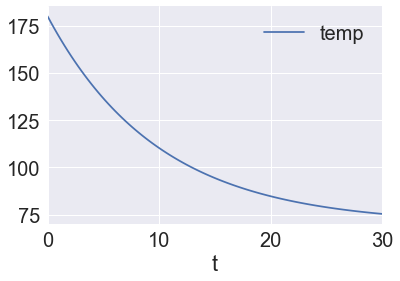

In [68]:
p = pd.read_csv('../tp1/datos/sd_teacup.csv',sep=',', names=['t', 'temp'], skiprows=1)
p.plot(x='t', y='temp')

Text(0.5,1,u'Evolucion de la temperatura para el modelo TeaCup')

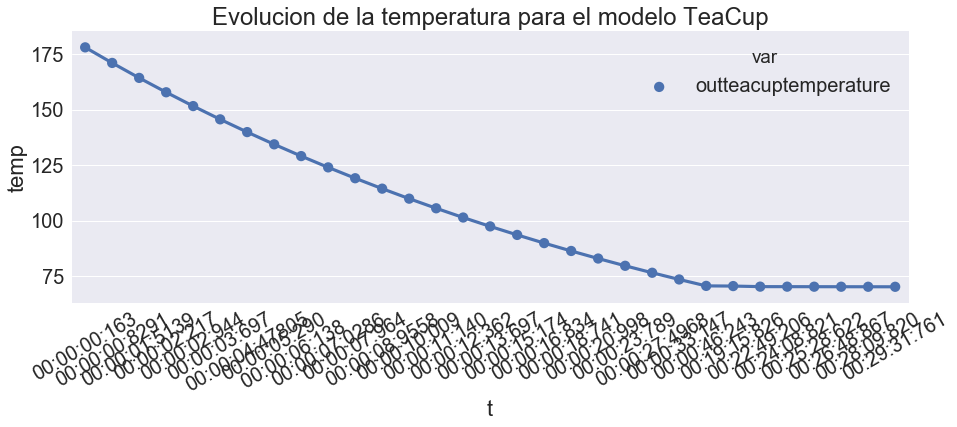

In [91]:
p = pd.read_csv('../tp1/datos/cd_teacup.csv',sep='\t+', engine='python', names=['t','var', 'temp'], skiprows=1)

#p.t = pd.to_datetime(p.t.str.strip(), format='%H:%M:%S:%f')


plt.figure(figsize=(15,5))
g=sea.pointplot(data=p.iloc[range(0, p.shape[0],4)], x='t', y='temp', hue='var')
#g.set(xticklabels=[])
locs, labels = plt.xticks()
g.set_xticklabels(labels, rotation=30)
g.set_title('Evolucion de la temperatura para el modelo TeaCup')
#g.legend_.remove()

## CD++

SIR

In [21]:
psd = pd.read_csv('../tp1/datos/sd_sir.csv', sep=',', names=['t', 'R_SD', 'I_SD', 'S_SD'], skiprows=1)
import datetime
psd.t = psd.t.apply(lambda x: datetime.datetime.fromtimestamp(x))
psd.t = psd.t.apply(lambda x: x.strftime("%M:%S:%f"))
psd2 = psd.melt(id_vars='t')
psd2.columns = ['t', 'var', 'val']
psd2['model'] = 'SD'


In [121]:
sample_ps2 = psd2.pivot_table(index='t', columns=['var']).reset_index().iloc[range(0, 3201, 100)]
sample_ps2.columns = sample_ps2.columns.droplevel()
sample_ps2.columns = [u't', u'I_SD', u'R_SD', u'S_SD']
sample_ps2_melted = sample_ps2.melt('t')
sample_ps2_melted['model'] = 'SD'

In [137]:
s_cd = p.query('var == "S_CD"')
i_cd = p.query('var == "I_CD"').iloc[range(0, 1500, 100)]
r_cd = p.query('var == "R_CD"').iloc[range(0, 1200, 100)]

In [139]:
i_cd.shape()

TypeError: 'tuple' object is not callable

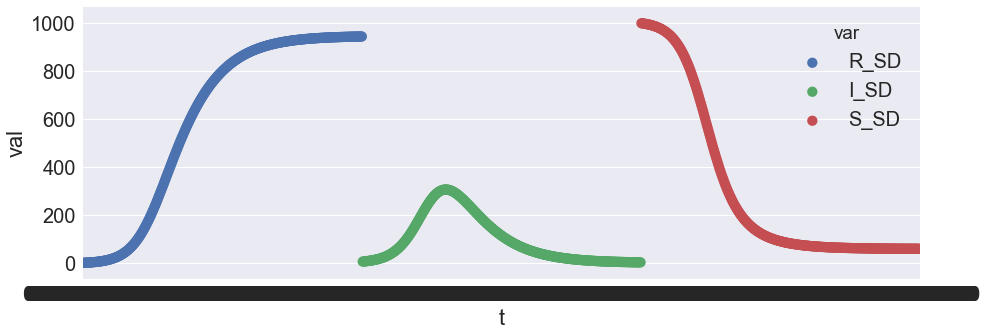

In [57]:
plt.figure(figsize=(15,5))
g=sea.pointplot(data=psd2.iloc[range(0, psd2.shape[0],10)], x='t', y='val', hue='var')

In [12]:
p = pd.read_csv('../tp1/datos/cd_sir_10m.tsv',sep='\t+', engine='python', names=['t','var', 'val'], skiprows=1)

p['model'] = 'CD'
p.t = pd.to_datetime(p.t.str.strip(), format='%H:%M:%S:%f')
p.t = p.t.apply(lambda x: x.strftime("%M:%S:%f"))

Text(0.5,1,u'Evolucion de la temperatura para el modelo TeaCup')

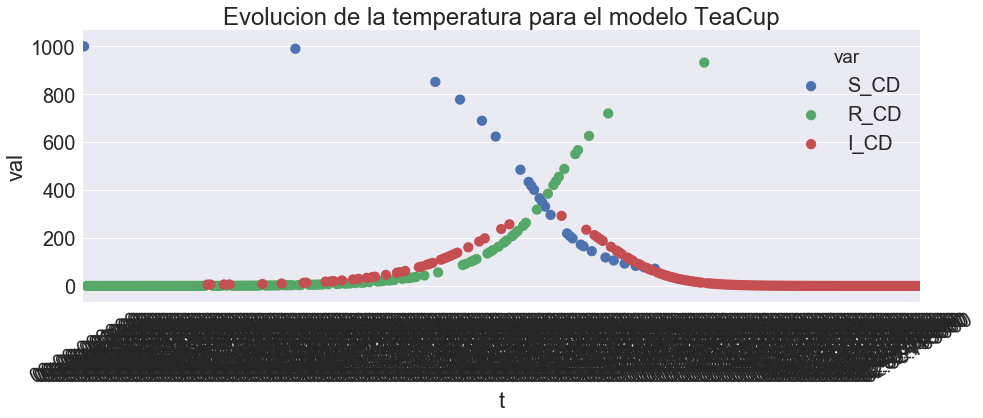

In [17]:
plt.figure(figsize=(15,5))
g=sea.pointplot(data=p.iloc[range(0, p.shape[0],10)], x='t', y='val', hue='var')
#g.set(xticklabels=[])
locs, labels = plt.xticks()
g.set_xticklabels(labels, rotation=30)
g.set_title('Evolucion de la temperatura para el modelo TeaCup')
#g.legend_.remove()

In [68]:
cd_sd_sir = pd.concat([p.iloc[range(0, p.shape[0], p.shape[0] / 200)],
                       psd2.iloc[range(0, psd2.shape[0], psd2.shape[0] / 200)]
])




In [65]:
psd2.iloc[range(0, psd2.shape[0], psd2.shape[0] / 200)].shape
p.iloc[range(0, p.shape[0], p.shape[0] / 200)].shape


(204, 4)

In [ ]:
g=sea.pointplot(data=cd_sd_sir.query('model == "SD"'), x='t', y='val', hue='var')

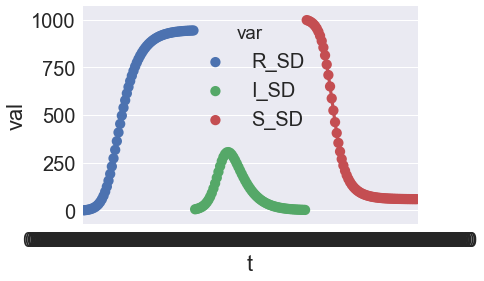

In [72]:
g=sea.pointplot(data=psd2.iloc[range(0, psd2.shape[0], psd2.shape[0] / 200)], x='t', y='val', hue='var')
#sub.query("val > 200 and val < 250 and (var == 'I_CD' or var == 'I_SD')")

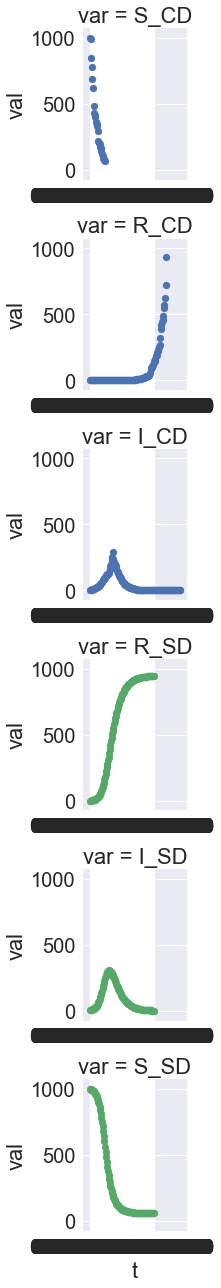

In [53]:

sub = cd_sd_sir.iloc[range(0, cd_sd_sir.shape[0], 10)]
g = sea.FacetGrid(sub,  row="var", hue='model')
g = g.map(plt.scatter, "t", 'val')

Text(0.5,1,u'Evolucion de la temperatura para el modelo TeaCup')

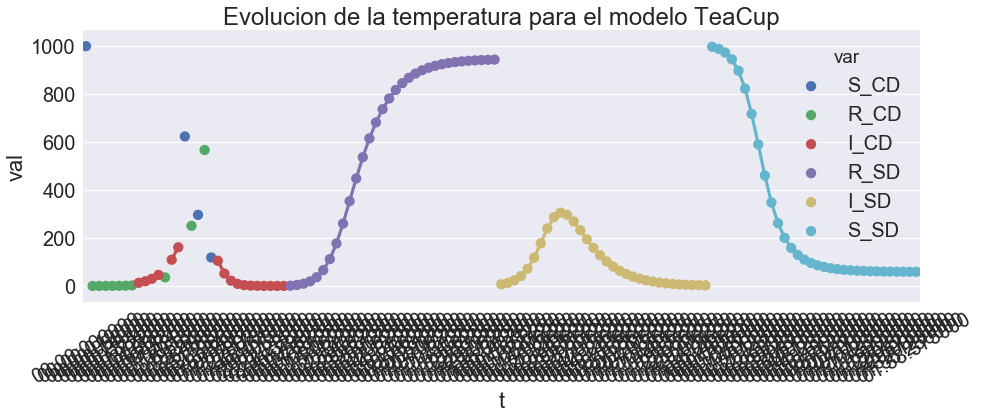

In [41]:
plt.figure(figsize=(15,5))
g=sea.pointplot(data=cd_sd_sir.iloc[range(0, cd_sd_sir.shape[0],100),:], x='t', y='val', hue='var')
g.set(xticklabels=[])
locs, labels = plt.xticks()
g.set_xticklabels(labels, rotation=30)
g.set_title('Evolucion de la temperatura para el modelo TeaCup')
#g.legend_.remove()

Text(0.5,1,u'Evolucion de la temperatura para el modelo TeaCup')

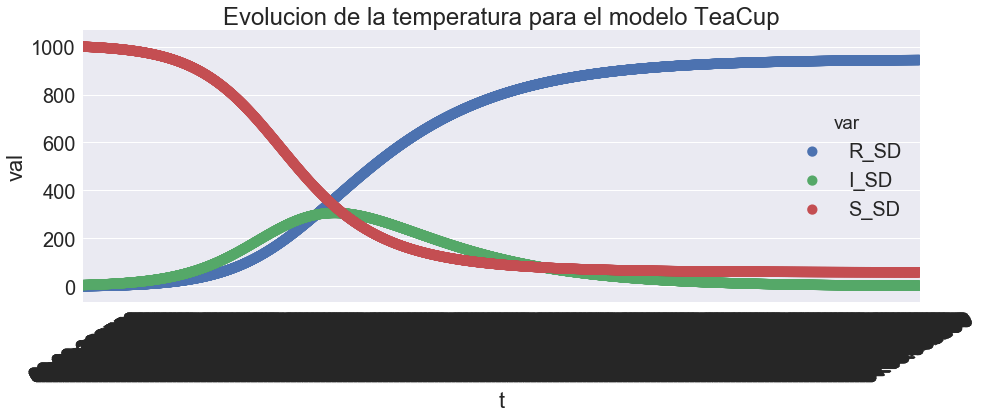

In [61]:
plt.figure(figsize=(15,5))
g=sea.pointplot(data=cd_sd_sir.query('model == "SD"'), x='t', y='val', hue='var')
g.set(xticklabels=[])
locs, labels = plt.xticks()
g.set_xticklabels(labels, rotation=30)
g.set_title('Evolucion de la temperatura para el modelo TeaCup')
#g.legend_.remove()

In [28]:
pd.DataFrame({'cd_t': cd_sd_sir.query('model == "CD"').t, 'sd_t': 
              cd_sd_sir.query('model == "SD"').t})#.plot(x='cd_t', y='sd_t')

,cd_t,sd_t
0,00:00:000000,00:00:000000
1,00:00:000000,00:00:031250
2,00:00:000000,00:00:062500
3,00:00:000000,00:00:093750
4,00:00:000000,00:00:125000
5,00:00:000000,00:00:156250
6,00:00:000000,00:00:187500
7,00:00:001000,00:00:218750
8,00:00:001000,00:00:250000
9,00:00:001000,00:00:281250
